In [2]:
%load_ext autoreload
%autoreload 2
from system.bio_model.cognitive_map import LifelongCognitiveMap

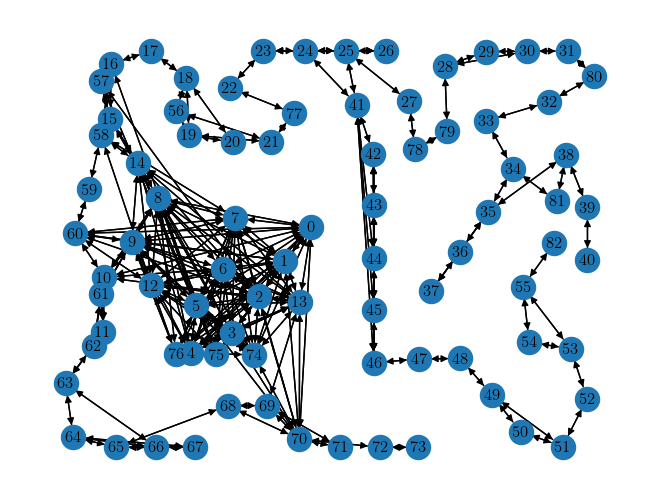

In [64]:
env_model = "Savinov_val3"
cogmap = LifelongCognitiveMap(reachability_estimator=None, load_data_from="after_exploration.gpickle")
cogmap.draw()

In [4]:
from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory

In [7]:
import matplotlib.pyplot as plt
from system.plotting.plotHelper import add_environment

# Visualize the BVC RE

In [33]:
from tqdm import tqdm
re = reachability_estimator_factory('bvc')

from system.controller.simulation.pybullet_environment import PybulletEnvironment

with PybulletEnvironment(env_model, visualize=False, contains_robot=False) as env:
    cogmap.get_place_cell_network().add_angles_and_lidar(env)

connections = []
for (p1, p2), attrs in tqdm(cogmap.node_network.edges.items()):
    reachability = re.reachability_factor(p1, p2)
    connections.append(reachability)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 472/472 [00:13<00:00, 34.73it/s]


In [34]:
max(connections), min(connections)

(0.20571508459459145, 0.0)

/tmp/ipykernel_42995/2697212569.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


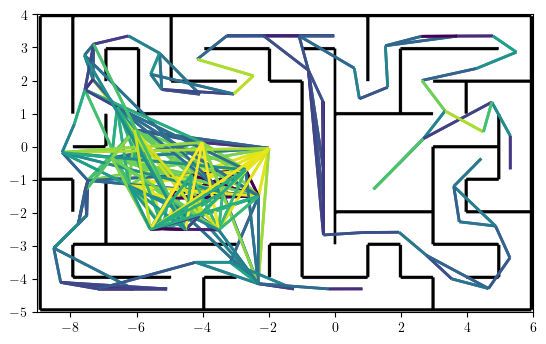

In [35]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.cm import get_cmap
from system.plotting.plotHelper import add_environment

def normalize(li):
    minv, maxv = min(li), max(li)
    return [(a - minv) / (maxv - minv) for a in li]

connections = normalize(connections)

fig, ax = plt.subplots()
add_environment(ax, env_model)
cmap = get_cmap('viridis')
lines = [[ start.pos, stop.pos ] for start, stop in cogmap.node_network.edges ]
lc = mc.LineCollection(lines, color=list(map(cmap, connections)), linewidths=2)
ax.add_artist(lc)

In [1]:
nodes = list(cogmap.node_network.nodes)
starting_node = nodes[19]

for re_name in ('distance',): #, 'view_overlap', 'bvc'):
    fig, ax = plt.subplots()
    re = reachability_estimator_factory(re_name, env_model='Savinov_val3')
    similarities = re.reachability_factor_batch(starting_node, nodes)
    lines = [[starting_node.pos, node.pos] for i, node in enumerate(nodes) if similarities[i] > -0.75]
    lc = mc.LineCollection(lines, color='black', linewidths=2)
    ax.add_artist(lc)
    add_environment(ax, env_model)
    ax.plot(*starting_node.pos, 'rx')
    ax.axis('off')
    ax.scatter([n.pos[0] for n in nodes], [n.pos[1] for n in nodes], c=similarities)
    #ax.set_title(re_name)

NameError: name 'cogmap' is not defined

In [27]:
similarities

[-1.7565147699973631,
 -2.3496285763042986,
 -3.130029209590178,
 -4.017804475863433,
 -5.1713323083589,
 -4.793494822314133,
 -3.998537977552179,
 -3.749037218765406,
 -5.821982323916665,
 -6.410995572846988,
 -7.133612358799732,
 -7.296646553647651,
 -5.90231126728319,
 -2.1338031804381803,
 -6.50225081254684,
 -7.468751056911495,
 -7.898488957989701,
 -7.123933158367105,
 -6.055683838774427,
 -5.437437869477664,
 -4.355681531412239,
 -3.521937110609284,
 -5.044001385833721,
 -4.958790088677884,
 -4.400394734347717,
 -4.076276181925614,
 -4.02180262253053,
 -3.170674679968367,
 -4.154836561503539,
 -4.973196955418076,
 -5.694949283459561,
 -6.5038715128830535,
 -5.527220215260018,
 -3.991537897454567,
 -4.067861103518703,
 -3.1577242278656,
 -2.2808996767349856,
 -1.6427858834465598,
 -5.472591283435459,
 -5.736754258721621,
 -5.652076045373229,
 -2.999945746986898,
 -2.0103365961029134,
 -1.0325282965345663,
 -0.0,
 -1.000119812438127,
 -2.015172604448302,
 -2.279665380418191,
 -2.9

# Visualize different REs and generate plots for presentation

In [62]:
pcs = list(cogmap.node_network.nodes)
main_pc = pcs[8]
other_pcs = [pcs[i] for i in (9, 14, 58, 19, 0, 74, 66)]

## The distance RE

In [65]:
from scripts.cogmap_utils import add_connections_to_map
re = reachability_estimator_factory('distance')
re.threshold_reachable = -2
add_connections_to_map(cogmap, re, add=True, remove=True)

deleting edge [3-0]: conn 0.61
deleting edge [4-0]: conn 0.535
deleting edge [4-1]: conn 0.655
deleting edge [4-2]: conn 0.585
deleting edge [5-0]: conn 0.525
deleting edge [5-1]: conn 0.525
deleting edge [6-0]: conn 0.69
deleting edge [7-0]: conn 0.64
deleting edge [7-3]: conn 0.62
deleting edge [7-4]: conn 0.745
deleting edge [8-0]: conn 0.6
deleting edge [8-1]: conn 0.605
deleting edge [8-2]: conn 0.415
deleting edge [8-3]: conn 0.51
deleting edge [8-4]: conn 0.48
deleting edge [8-5]: conn 0.705
deleting edge [8-6]: conn 0.715
deleting edge [8-7]: conn 0.36
deleting edge [9-0]: conn 0.565
deleting edge [9-1]: conn 0.355
deleting edge [9-2]: conn 0.355
deleting edge [9-3]: conn 0.69
deleting edge [9-4]: conn 0.565
deleting edge [9-5]: conn 0.44
deleting edge [9-6]: conn 0.565
deleting edge [9-7]: conn 0.63
deleting edge [10-0]: conn 0.30000000000000004
deleting edge [10-6]: conn 0.55
deleting edge [10-8]: conn 0.45499999999999996
Adding bidirectional edge: p=11, q=9, weight=2.9287151

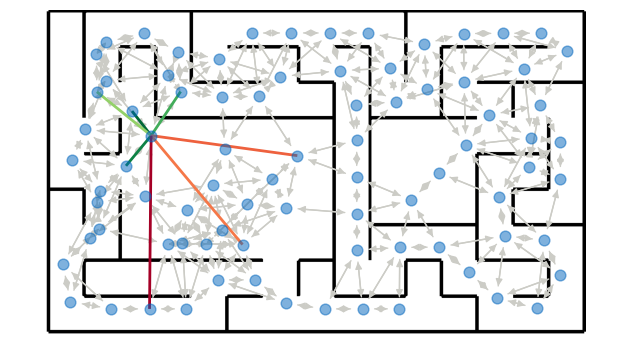

In [66]:
import matplotlib.collections as mc
from matplotlib.cm import ScalarMappable
from matplotlib import colormaps
from system.plotting.plotResults import plotCognitiveMap

re = reachability_estimator_factory('distance')
re_factors = re.reachability_factor_batch(main_pc, other_pcs)
cmap = ScalarMappable(norm=None, cmap=colormaps['RdYlGn'])
cmap.set_array(re_factors)
lines = [[other_pc.pos, main_pc.pos] for other_pc in other_pcs]
lc = mc.LineCollection(lines, color=list(map(cmap.to_rgba, re_factors)), linewidths=2)
fig, ax = plt.subplots()
add_environment(ax, 'Savinov_val3')
ax.add_artist(lc)
plotCognitiveMap(ax, cogmap, with_edges=True)
fig.tight_layout()
fig.savefig('../../presentation/figures/arch/distance_re.png')

## The simulation RE

In [57]:
%pdef vector_navigation

 vector_navigation(
    env: system.controller.simulation.pybullet_environment.PybulletEnvironment,
    compass: system.controller.local_controller.compass.Compass,
    gc_network: Optional[system.bio_model.grid_cell_model.GridCellNetwork] = None,
    controller: Optional[system.controller.local_controller.local_controller.LocalController] = None,
    target_gc_spiking=None,
    step_limit=inf,
    plot_it=False,
    collect_data_freq=False,
    collect_data_reachable=False,
    collect_nr_steps=False,
    exploration_phase=False,
    pc_network: Optional[system.bio_model.place_cell_model.PlaceCellNetwork] = None,
    cognitive_map: Optional[system.bio_model.cognitive_map.CognitiveMapInterface] = None,
    goal_pos: Optional[system.types.Vector2D] = None,
    add_nodes=True,
    hooks: list[typing.Callable[[int, system.controller.simulation.pybullet_environment.Robot], NoneType]] = [],
) -> tuple[bool, list[tuple[system.types.Vector2D, float, 'np.ndarray[float, 9600]']] | tuple | int |

In [67]:
from system.controller.local_controller.local_navigation import vector_navigation
from system.controller.simulation.pybullet_environment import PybulletEnvironment, Robot
from system.controller.local_controller.compass import AnalyticalCompass

logs = []

with PybulletEnvironment(visualize=False, env_model='Savinov_val3', contains_robot=False) as env:
    for i, other_pc in enumerate(other_pcs):
        compass = AnalyticalCompass(start_pos=main_pc.pos, goal_pos=other_pc.pos)
        with Robot(env=env, base_position=main_pc.pos) as robot:
            success, nr_steps = vector_navigation(env, compass, collect_nr_steps=True)
            traj = robot.data_collector.xy_coordinates
        logs.append(dict(success=success, traj=traj))
        print(f'Traj {i} finished ({nr_steps} timesteps)')

Traj 0 finished (279 timesteps)
Traj 1 finished (230 timesteps)
Traj 2 finished (462 timesteps)
Traj 3 finished (307 timesteps)
Traj 4 finished (880 timesteps)
Traj 5 finished (824 timesteps)
Traj 6 finished (895 timesteps)


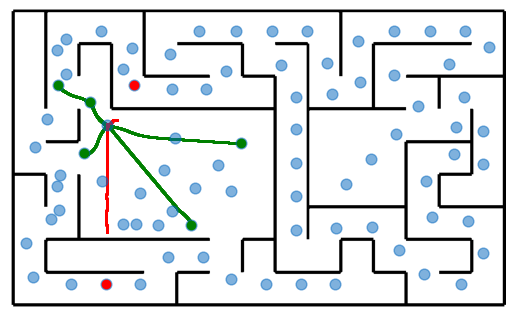

In [72]:
import numpy as np
fig, ax = plt.subplots()
add_environment(ax, 'Savinov_val3')
plotCognitiveMap(ax, cogmap, with_edges=False)
for line, pc in zip(logs, other_pcs):
    traj = np.array(line['traj'])
    ax.scatter(traj[:, 0], traj[:, 1], color='green' if line['success'] else 'red', s=1)
    ax.plot(*pc.pos, marker='o', color='green' if line['success'] else 'red')
fig.savefig('../../presentation/figures/arch/simulation_re.png')

In [70]:
help(ax.plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt*